In [268]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

from pandas.plotting import scatter_matrix
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [320]:
cars_df = pd.read_csv("data/vehicles.csv")
cars_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [321]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [322]:
cars_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [326]:
cars_df_graphing = cars_df = cars_df.dropna(subset = ["year", "fuel", "manufacturer", "odometer", "state",\
                                                      "title_status", "model"])
cars_df_graphing

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [327]:
cars_df_graphing = cars_df_graphing.drop(columns = ["VIN", "id", "size", "model"])
cars_df_graphing["cylinders"].fillna(cars_df_graphing["cylinders"].mode()[0], inplace = True)
cars_df_graphing["condition"].fillna(cars_df_graphing["condition"].mode()[0], inplace = True)
cars_df_graphing["drive"].fillna(cars_df_graphing["drive"].mode()[0], inplace = True)
cars_df_graphing["transmission"].fillna(cars_df_graphing["transmission"].mode()[0], inplace = True)
cars_df_graphing["paint_color"].fillna(cars_df_graphing["paint_color"].mode()[0], inplace = True)
cars_df_graphing

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white,wy
426876,wyoming,30590,2020.0,volvo,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


paint_color
white     186489
black      59891
silver     40911
blue       29388
red        28185
grey       23118
green       6553
brown       6292
custom      6227
orange      1766
yellow      1727
purple       597
Name: count, dtype: int64


,price
paint_color,
black,2599432796
blue,479735031
brown,96053609
custom,97442356
green,3820982016
grey,469747383
orange,32174473
purple,8596879
red,642578728


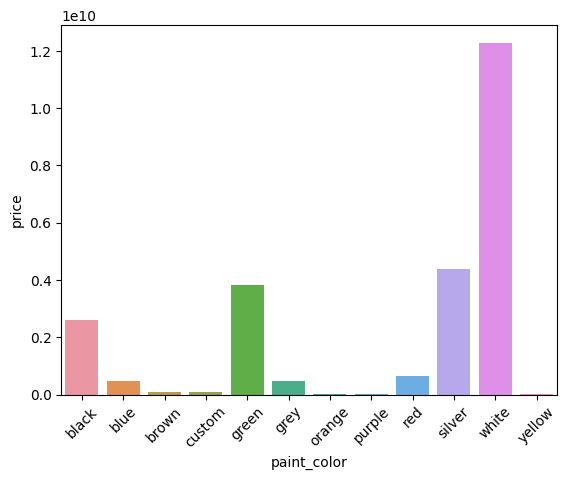

In [336]:
paint_vs_price = cars_df_graphing.groupby("paint_color")[["price"]].sum()
sns.barplot(paint_vs_price, x = paint_vs_price.index, y = "price")
plt.xticks(rotation = 45)
print(cars_df_graphing["paint_color"].value_counts())
paint_vs_price

# white is the color that brings in the most revenue, however on average green costs much more 

manufacturer
ford               68165
chevrolet          52503
toyota             32649
honda              20483
jeep               18253
nissan             18174
ram                16832
gmc                15984
bmw                14248
dodge              12901
mercedes-benz      11224
hyundai             9927
subaru              9207
volkswagen          9039
kia                 8149
lexus               7943
audi                7352
cadillac            6564
acura               5815
chrysler            5713
buick               5307
mazda               5201
infiniti            4687
lincoln             4039
volvo               3221
mitsubishi          3114
mini                2298
pontiac             2199
jaguar              1894
rover               1755
porsche             1314
mercury             1146
saturn              1047
alfa-romeo           887
tesla                819
fiat                 770
harley-davidson      137
ferrari               77
datsun                62
aston-martin

,price
manufacturer,
acura,20142.250043
alfa-romeo,28185.457723
aston-martin,53494.541667
audi,23613.284956
bmw,19120.478453
buick,37744.029207
cadillac,20071.133303
chevrolet,23939.546597
chrysler,10320.605986


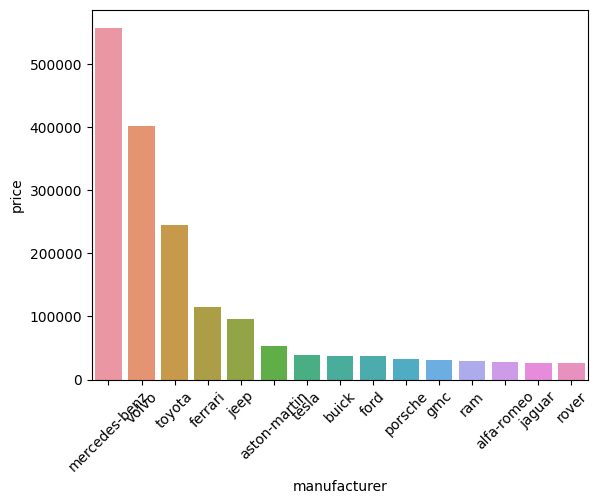

In [346]:
manu_vs_price = cars_df_graphing.groupby("manufacturer")[["price"]].mean()

top_manu = manu_vs_price.sort_values(by = "price", ascending = False).head(15)

sns.barplot(top_manu, x = top_manu.index, y = "price")
plt.xticks(rotation = 45)
print(cars_df_graphing["manufacturer"].value_counts())
manu_vs_price

condition
good         273819
excellent     89777
like new      19970
fair           5918
new            1128
salvage         532
Name: count, dtype: int64


,price
condition,
excellent,55902.749379
fair,869151.479723
good,51165.166694
like new,37341.221032
new,24529.443262
salvage,3735.580827


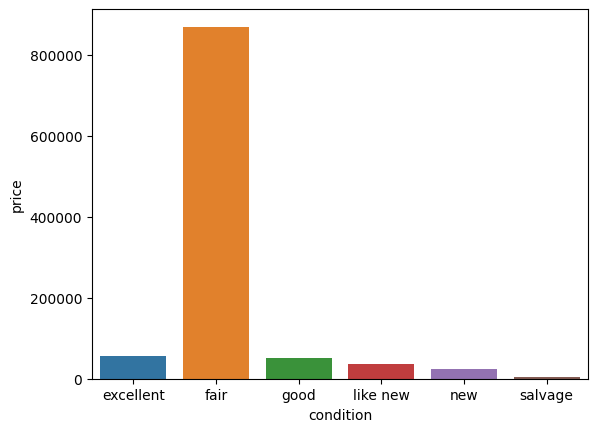

In [350]:
condition_vs_price = cars_df_graphing.groupby("condition")[["price"]].mean()
print(cars_df_graphing["condition"].value_counts())
sns.barplot(condition_vs_price, x = condition_vs_price.index, y = "price")
condition_vs_price

In [272]:
# from the permutations of the last model, the top 5 features were region, year, fuel, state, and odometer 
# there are few missing entries for year and fuel, so we can drop those entries 

cars_df = cars_df.dropna(subset = ["year", "fuel", "manufacturer", "odometer", "state", "title_status", "model"])
cars_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [273]:
# VIN and ID aren't important so we can drop those columns 
cars_df_clean = cars_df.drop(columns = ["VIN", "id", "size", "model", "price"])
cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391144 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        391144 non-null  object 
 1   year          391144 non-null  float64
 2   manufacturer  391144 non-null  object 
 3   condition     232341 non-null  object 
 4   cylinders     228432 non-null  object 
 5   fuel          391144 non-null  object 
 6   odometer      391144 non-null  float64
 7   title_status  391144 non-null  object 
 8   transmission  389604 non-null  object 
 9   drive         275406 non-null  object 
 10  type          308514 non-null  object 
 11  paint_color   278229 non-null  object 
 12  state         391144 non-null  object 
dtypes: float64(2), object(11)
memory usage: 41.8+ MB


In [274]:
cars_df_clean["type"].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'van', 'convertible', 'wagon',
       'bus'], dtype=object)

In [275]:
# Calculate the mode of the "type" column
mode_type = cars_df_clean["type"].mode()[0]

# Replace missing values with the mode
cars_df_clean["type"].fillna(mode_type, inplace = True)

cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391144 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        391144 non-null  object 
 1   year          391144 non-null  float64
 2   manufacturer  391144 non-null  object 
 3   condition     232341 non-null  object 
 4   cylinders     228432 non-null  object 
 5   fuel          391144 non-null  object 
 6   odometer      391144 non-null  float64
 7   title_status  391144 non-null  object 
 8   transmission  389604 non-null  object 
 9   drive         275406 non-null  object 
 10  type          391144 non-null  object 
 11  paint_color   278229 non-null  object 
 12  state         391144 non-null  object 
dtypes: float64(2), object(11)
memory usage: 41.8+ MB


In [276]:
#replacing categorical columns with modes 

cars_df_clean["cylinders"].fillna(cars_df_clean["cylinders"].mode()[0], inplace = True)
cars_df_clean["condition"].fillna(cars_df_clean["condition"].mode()[0], inplace = True)
cars_df_clean["drive"].fillna(cars_df_clean["drive"].mode()[0], inplace = True)
cars_df_clean["transmission"].fillna(cars_df_clean["transmission"].mode()[0], inplace = True)
cars_df_clean["paint_color"].fillna(cars_df_clean["paint_color"].mode()[0], inplace = True)
#cars_df_clean.dropna()
cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391144 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        391144 non-null  object 
 1   year          391144 non-null  float64
 2   manufacturer  391144 non-null  object 
 3   condition     391144 non-null  object 
 4   cylinders     391144 non-null  object 
 5   fuel          391144 non-null  object 
 6   odometer      391144 non-null  float64
 7   title_status  391144 non-null  object 
 8   transmission  391144 non-null  object 
 9   drive         391144 non-null  object 
 10  type          391144 non-null  object 
 11  paint_color   391144 non-null  object 
 12  state         391144 non-null  object 
dtypes: float64(2), object(11)
memory usage: 41.8+ MB


In [277]:
# checking which features might influence price the most 
categorical_cols = cars_df_clean.select_dtypes(exclude = "number")
categorical_cols

,region,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
27,auburn,gmc,good,8 cylinders,gas,clean,other,4wd,pickup,white,al
28,auburn,chevrolet,good,8 cylinders,gas,clean,other,4wd,pickup,blue,al
29,auburn,chevrolet,good,8 cylinders,gas,clean,other,4wd,pickup,red,al
30,auburn,toyota,good,8 cylinders,gas,clean,other,4wd,pickup,red,al
31,auburn,ford,excellent,6 cylinders,gas,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,nissan,good,6 cylinders,gas,clean,other,fwd,sedan,white,wy
426876,wyoming,volvo,good,6 cylinders,gas,clean,other,fwd,sedan,red,wy
426877,wyoming,cadillac,good,6 cylinders,diesel,clean,other,4wd,hatchback,white,wy
426878,wyoming,lexus,good,6 cylinders,gas,clean,other,fwd,sedan,silver,wy


In [278]:
categorical_names = categorical_cols.columns.tolist()
categorical_names

['region',
 'manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

In [279]:
numerical_cols = cars_df_clean.select_dtypes(include = "number")
numerical_cols 

,year,odometer
27,2014.0,57923.0
28,2010.0,71229.0
29,2020.0,19160.0
30,2017.0,41124.0
31,2013.0,128000.0
...,...,...
426875,2019.0,32226.0
426876,2020.0,12029.0
426877,2020.0,4174.0
426878,2018.0,30112.0


In [280]:
numerical_names = numerical_cols.columns.tolist()
numerical_names

['year', 'odometer']

In [281]:
cars_df_cleaned_encoded = pd.get_dummies(cars_df_clean, columns = categorical_names)
cars_df_cleaned_encoded = cars_df_cleaned_encoded.astype(int)
cars_df_cleaned_encoded.columns.tolist()

['year',
 'odometer',
 'region_SF bay area',
 'region_abilene',
 'region_akron / canton',
 'region_albany',
 'region_albuquerque',
 'region_altoona-johnstown',
 'region_amarillo',
 'region_ames',
 'region_anchorage / mat-su',
 'region_ann arbor',
 'region_annapolis',
 'region_appleton-oshkosh-FDL',
 'region_asheville',
 'region_ashtabula',
 'region_athens',
 'region_atlanta',
 'region_auburn',
 'region_augusta',
 'region_austin',
 'region_bakersfield',
 'region_baltimore',
 'region_baton rouge',
 'region_battle creek',
 'region_beaumont / port arthur',
 'region_bellingham',
 'region_bemidji',
 'region_bend',
 'region_billings',
 'region_binghamton',
 'region_birmingham',
 'region_bismarck',
 'region_bloomington',
 'region_bloomington-normal',
 'region_boise',
 'region_boone',
 'region_boston',
 'region_boulder',
 'region_bowling green',
 'region_bozeman',
 'region_brainerd',
 'region_brownsville',
 'region_brunswick',
 'region_buffalo',
 'region_butte',
 'region_cape cod / islands',
 '

In [282]:
# making sure there are no null values in data frame 
total_null_count = cars_df_cleaned_encoded.isnull().sum().sum()
total_null_count

0

In [283]:
cars_df_cleaned_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391144 entries, 27 to 426879
Columns: 554 entries, year to state_wy
dtypes: int32(554)
memory usage: 829.6 MB


In [284]:
# data is all processed and cleaned, now we start building models 

X = cars_df_cleaned_encoded
y = cars_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = ColumnTransformer([
    ("scaler", StandardScaler(), numerical_names)
])

pipe = Pipeline([
    ("scaler", scaler), 
    ("linreg", LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['year', 'odometer'])])),
                ('linreg', LinearRegression())])

In [285]:
y_preds = pipe.predict(X_test)
y_preds

array([79682.93625992, 80069.96027535, 55614.71761747, ...,
       39513.29363297, 88124.50298498, 55986.0135614 ])

In [286]:
mse = mean_squared_error(y_preds, y_test)
mae = mean_absolute_error(y_preds, y_test)
print(mse, mae)

211559316694.61563 66750.08680724625


In [287]:
len(y_test)

78229

In [288]:
# model 2, SequentialFeatureSelector 

X = cars_df_cleaned_encoded
y = cars_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sfs = SequentialFeatureSelector(Lasso(), n_features_to_select = 5)
sfs.fit(X_train, y_train)
features_to_use = X_train.columns[sfs.get_support()]
features_to_use

Index(['region_fort smith, AR', 'manufacturer_ferrari',
       'manufacturer_land rover', 'condition_excellent', 'paint_color_white'],
      dtype='object')

In [289]:
X

,year,odometer,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,2014,57923,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,2010,71229,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,2020,19160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,2017,41124,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,2013,128000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,2019,32226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426876,2020,12029,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426877,2020,4174,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426878,2018,30112,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [290]:
scaler = ColumnTransformer([
    ("scaler", StandardScaler(), numerical_names)
])

pipe2 = Pipeline([
    ("linreg", LinearRegression())
])

pipe2.fit(X_train[features_to_use], y_train)
y_preds2 = pipe2.predict(X_test[features_to_use])
y_preds2

array([64440.35686004, 64440.35686004, 69047.59783703, ...,
       79745.61252269, 75138.3715457 , 79745.61252269])

In [291]:
mse2 = mean_squared_error(y_preds2, y_test)
mae2 = mean_absolute_error(y_preds2, y_test)
print(mse2, mae2)

206131314963.73352 59544.3619534142


In [309]:
# model 3 RFE with ridge regression 

X = cars_df_cleaned_encoded
y = cars_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
idx1 = X_train.index
idx2 = X_test.index

numerical_names = ["year", "odometer"]
categorical_names = X.columns.tolist() 
categorical_names.remove("year")
categorical_names.remove("odometer")


scaler = ColumnTransformer([
    ("scaler", StandardScaler(), numerical_names), 
    ("passthrough", "passthrough", categorical_names)
])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_df = pd.DataFrame(X_train_scaled, columns = numerical_names + categorical_names)
X_test_df = pd.DataFrame(X_test_scaled, columns = numerical_names + categorical_names)
X_train_df.index = idx
X_test_df

,year,odometer,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,-0.071984,-0.146653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.071984,0.181015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.275275,-0.222738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.969794,-0.411093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.303491,0.264812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78224,0.622534,-0.310350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78225,0.622534,-0.331382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78226,0.506781,-0.320827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78227,-0.187737,0.233303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312915 entries, 14837 to 134313
Columns: 554 entries, year to state_wy
dtypes: float64(554)
memory usage: 1.3 GB


In [304]:
sfs2 = SequentialFeatureSelector(Lasso(), n_features_to_select = 5)
sfs2.fit(X_train_df, y_train)
features_to_use = X_train_df.columns[sfs2.get_support()]
features_to_use

Index(['region_fort smith, AR', 'manufacturer_ferrari',
       'manufacturer_land rover', 'condition_excellent', 'paint_color_white'],
      dtype='object')

In [305]:
pipe3 = Pipeline([
    ("linreg", LinearRegression())
])

pipe3.fit(X_train_df[features_to_use], y_train)

Pipeline(steps=[('linreg', LinearRegression())])

In [311]:
y_preds3 = pipe3.predict(X_test_df[features_to_use])
y_preds3

array([64440.35686004, 64440.35686004, 69047.59783703, ...,
       79745.61252269, 75138.3715457 , 79745.61252269])

In [312]:
mse3 = mean_squared_error(y_preds3, y_test)
mae3 = mean_absolute_error(y_preds3, y_test)
print(mse3, mae3)

206131314963.73352 59544.3619534142


In [361]:
error_df_mse = pd.DataFrame({"Linreg" : [mse], "Linreg sfs" : [mse2]})
error_df_mse.index = ["MSE"]
error_df_mae = pd.DataFrame({"Linreg" : [mae], "Linreg sfs" : [mae2]})
error_df_mae.index = ["MSE"]

<Figure size 800x400 with 0 Axes>

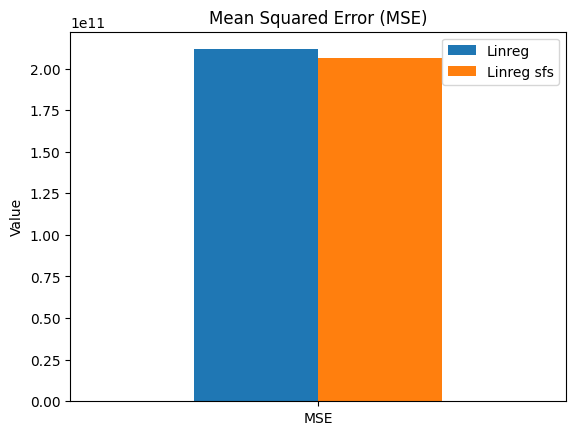

In [359]:
# Bar plot for MSE
plt.figure(figsize=(8, 4))
error_df_mse.plot.bar(rot = 0)
plt.title("Mean Squared Error (MSE)")
plt.ylabel("Value")
plt.show()

<Figure size 800x400 with 0 Axes>

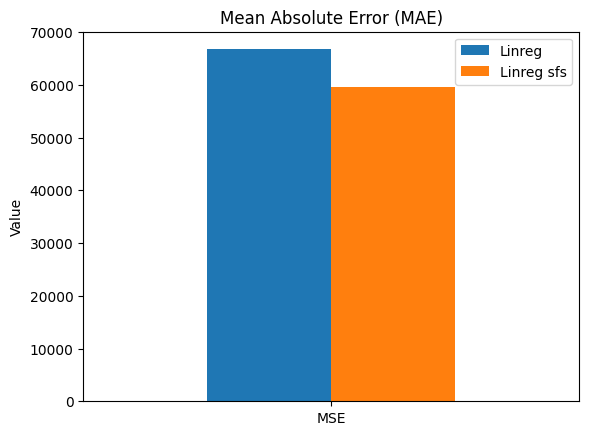

In [360]:
# Bar plot for MAE
plt.figure(figsize=(8, 4))
error_df_mae.plot.bar(rot = 0)
plt.title("Mean Absolute Error (MAE)")
plt.ylabel("Value")
plt.show()